In [73]:
import numpy as np 

def point_between(p1,p2):
    gcd = math.gcd(p1[0]-p2[0],p1[1]-p2[1])
    steps = np.array((p1-p2)//gcd)
    xp = np.array(range(p2[0],p1[0],steps[0])) if steps[0]!=0 else np.array([p1[0]]*(abs(p2[1]-p1[1])))
    yp = np.array(range(p2[1],p1[1],steps[1])) if steps[1]!=0 else np.array([p1[1]]*(abs(p2[0]-p1[0])))
    points = list(zip(xp,yp))
    return points

def init_2d_list(rows, columns):
    return [[0 for x in range(columns)] for y in range(rows)]

def read_input(input_file):
    raw_input_map=open(input_file).read().splitlines()
    input_map=[list(raw_input_map[i]) for i in range(len(raw_input_map))]
    asteroids=np.array([list(map(str, input_map[i])) for i in range(len(input_map))])
    return asteroids

def print_scene(asteroids):
    for row in asteroids:
        for c in row:
            print (c, end="")
        print ("")

def find_visible_moons(point, asteroids):
    visible_moons = 0
    covered_ast = np.zeros(asteroids.shape, dtype=int)
    for r,row in enumerate(asteroids):
        for c,astr in enumerate(row):
            probe_point = np.array([r,c]) 
            if (point == probe_point).all(): 
                continue
            if asteroids[tuple(probe_point)]=='.': continue
                
            point_in_between = point_between(point, probe_point)
            for p in reversed(point_in_between): 
                if asteroids[p]=="#": 
                    break
            if covered_ast[p] == 0:
                covered_ast[p] = 1
                visible_moons +=1
    return visible_moons

def find_best_moon(asteroids):
    max_visible = 0
    best_station = np.array([0,0])
    for r,row in enumerate(asteroids):
        for c,astr in enumerate(row):
            current_station = np.array([r,c])
            if asteroids[tuple(current_station)] == '.': continue
            visible_moons = find_visible_moons(current_station, asteroids)
            if max_visible < visible_moons:
                max_visible = visible_moons
                best_station = current_station
    return max_visible, best_station

asteroids = read_input('input.txt')
# asteroids = read_input('test1.txt')
# asteroids = read_input('test2.txt')
# asteroids = read_input('test3.txt')
# asteroids = read_input('test4.txt')
# asteroids = read_input('test5.txt')
max_visible, best_station = find_best_moon(asteroids)
print ('rows, cols:', asteroids.shape)
print_scene(asteroids)
print (max_visible)
print (best_station)


rows, cols: (23, 23)
.###..#......###..#...#
#.#..#.##..###..#...#.#
#.#.#.##.#..##.#.###.##
.#..#...####.#.##..##..
#.###.#.####.##.#######
..#######..##..##.#.###
.##.#...##.##.####..###
....####.####.#########
#.########.#...##.####.
.#.#..#.#.#.#.##.###.##
#..#.#..##...#..#.####.
.###.#.#...###....###..
###..#.###..###.#.###.#
...###.##.#.##.#...#..#
#......#.#.##..#...#.#.
###.##.#..##...#..#.#.#
###..###..##.##..##.###
###.###.####....######.
.###.#####.#.#.#.#####.
##.#.###.###.##.##..##.
##.#..#..#..#.####.#.#.
.#.#.#.##.##########..#
#####.##......#.#.####.
230
[11 19]


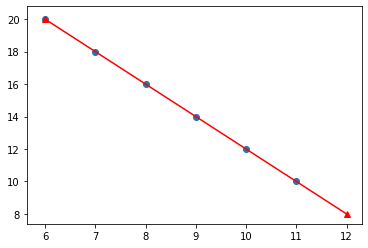

In [80]:
import math
from matplotlib import pyplot as plt
p1 = np.array([12,8])
p2 = np.array([6,20])

points = point_between(p1,p2)
plt.plot([p1[0],p2[0]],[p1[1],p2[1]], 'r^-')
unzipped_points = (list(zip(*points)))
if unzipped_points:
    plt.scatter(*unzipped_points)
plt.show()

In [79]:
from operator import itemgetter
import itertools, operator
from scipy.spatial import distance

def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    # this problem will not work without the rounding below!
    return round(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)),10) 

up = (0,-1)
next_angle = []
coords_to_angle = {}
min_angle=999
bx=best_station[1]
by=best_station[0]
for r,row in enumerate(asteroids):
    for c,col in enumerate(row):
        if asteroids[(r,c)]=='#' and (c,r)!= (best_station[1],best_station[0]):
            ang = angle_between(up, (c-bx,r-by) )
            if c<bx :
                ang= 2*math.pi-ang
            next_angle.append((ang, (r,c)))
            coords_to_angle[(r,c)] = ang
next_angle_sorted = sorted(next_angle,key=itemgetter(0))

print (best_station)
for r,row in enumerate(asteroids):
    for c,col in enumerate(row):
        if (c,r) == (best_station[1],best_station[0]):
            print ("XX|", end="")
        elif asteroids[(r,c)]==".":
            print (col+col+'|', end="")
        else:
            print (f"{coords_to_angle[(r,c)]:02.0f}|", end="")
    print("")
    

[11 19]
..|05|05|05|..|..|05|..|..|..|..|..|..|06|06|06|..|..|06|..|..|..|00|
05|..|05|..|..|05|..|05|05|..|..|06|06|06|..|..|06|..|..|..|00|..|00|
05|..|05|..|05|..|05|05|..|05|..|..|06|06|..|06|..|06|06|00|..|00|00|
..|05|..|..|05|..|..|..|05|05|05|05|..|06|..|06|06|..|..|00|00|..|..|
05|..|05|05|05|..|05|..|05|05|05|05|..|06|06|..|06|06|06|00|00|00|00|
..|..|05|05|05|05|05|05|05|..|..|05|05|..|..|06|06|..|06|..|00|00|00|
..|05|05|..|05|..|..|..|05|05|..|05|05|..|05|06|06|06|..|..|00|00|01|
..|..|..|..|05|05|05|05|..|05|05|05|05|..|05|05|06|06|06|00|00|00|01|
05|..|05|05|05|05|05|05|05|05|..|05|..|..|..|05|05|..|06|00|00|01|..|
..|05|..|05|..|..|05|..|05|..|05|..|05|..|05|05|..|05|06|00|..|01|01|
05|..|..|05|..|05|..|..|05|05|..|..|..|05|..|..|05|..|05|00|01|01|..|
..|05|05|05|..|05|..|05|..|..|..|05|05|05|..|..|..|..|05|XX|02|..|..|
05|05|05|..|..|05|..|05|05|05|..|..|05|05|05|..|04|..|04|03|02|..|02|
..|..|..|05|05|05|..|05|05|..|04|..|04|04|..|04|..|..|..|03|..|..|02|
05|..|..|..|

In [78]:
res = [group for group in next_angle if group[0]==0]
res2 = itertools.groupby(next_angle_sorted, key=operator.itemgetter(0))
ang_to_coords = []
for key, group in res2:
    ang_to_coords.append((key, list(group)))

ind =199 
mind = min(ang_to_coords[ind][1], key=lambda x: distance.euclidean(x[1], best_station ))
print ("answer: " , mind[1][1]*100+mind[1][0])

# nth_asteroid_removed = 0
# print ('station', (best_station[1],best_station[0]))
# while True:
#     for p in ang_to_coords:
#         mind = min(p[1], key=lambda x: distance.euclidean(x[1], (best_station[0], best_station[1])));
#         print ("mind:", mind)
#         p[1].remove(mind)
#         nth_asteroid_removed +=1
#         if nth_asteroid_removed == 200:
#             print(p)
#             break
#         if len(p[1])== 0:
#             print ("angle with no points left: ", p)
#             ang_to_coords.remove(p)
#     if nth_asteroid_removed == 200:
#             print(p)
#             break

answer:  1205
